In [1]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

2022-08-05 10:36:05.650421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 10:36:05.650455: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Set random seed
seed = 21

In [3]:
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Normalize inputs
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [22]:
# Define model structure
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, 3, input_shape=(32, 32, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(class_num, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 64)       

In [24]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 85s 107ms/step - loss: 1.3703 - accuracy: 0.5162 - val_loss: 1.0685 - val_accuracy: 0.6150
Epoch 2/30
782/782 [==============================] - 83s 106ms/step - loss: 0.9577 - accuracy: 0.6673 - val_loss: 0.8370 - val_accuracy: 0.7027
Epoch 3/30
782/782 [==============================] - 83s 107ms/step - loss: 0.8098 - accuracy: 0.7181 - val_loss: 0.7713 - val_accuracy: 0.7259
Epoch 4/30
782/782 [==============================] - 83s 107ms/step - loss: 0.7176 - accuracy: 0.7509 - val_loss: 0.8043 - val_accuracy: 0.7328
Epoch 5/30
782/782 [==============================] - 84s 107ms/step - loss: 0.6514 - accuracy: 0.7749 - val_loss: 0.7086 - val_accuracy: 0.7506
Epoch 6/30
782/782 [==============================] - 83s 107ms/step - loss: 0.5885 - accuracy: 0.7945 - val_loss: 0.6880 - val_accuracy: 0.7612
Epoch 7/30
782/782 [==============================] - 84s 107ms/step - loss: 0.5421 - accuracy: 0.8117 - val_loss: 0.6104 - val_ac

KeyboardInterrupt: 

In [21]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
#82.79

Accuracy: 81.71%


In [12]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
#82.79

Accuracy: 82.79%


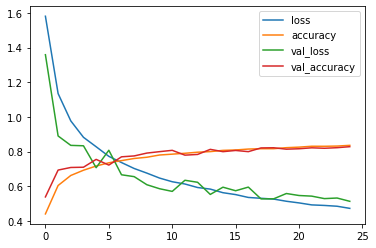

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()